We fit a gaussian mixture model to the factor scores of all individuals trying to find the best number of clusters using the BIC

In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob

import pylab as plt
from matplotlib.pyplot import get_cmap
%matplotlib inline  

src_dir = os.path.abspath(os.path.join(os.pardir,'personality-types-orig/src'))
sys.path[0] = src_dir

from analysis.cluster_density import gmm_kd
from analysis.data_sample import get_subset

# Load data and setup

In [2]:
# factor scores
# path_read = os.path.join(src_dir,os.pardir,'data_filter')
fname_read = 'data/TIPI_fa_NEOAC.npy'
arrTIPI =  np.load(fname_read)

# parameters for fitting
n_rep = 10 # number of different initial conditions for optimization
arr_Nc = np.arange(1,20,1) ## range of values for number of clusters

# these are not needed but will be specified
n_rep_kd = 0 # number of randomizations for estaimting density --> not needed here: 0
bw = -1 # bandwidth for density estimation (-1, estimate from avg nearest-neighbor distance)
N_samples = 0 # number of pairs of n.n. for estimating bandwidth --> not needed here:0


In [3]:
#####
# z-score the data in each dimension
#####
N_,D_ = np.shape(arrTIPI)
for d in range(D_):
    x_tmp = arrTIPI[:,d]
    x_mu = np.mean(x_tmp)
    x_std = np.std(x_tmp)
    arrTIPI[:,d] = (x_tmp - x_mu)/x_std

# scores are already normed - see TIPI_Scoring.ipynb
# arrTIPI = np.load('data/TIPI_scored_normed_NEOAC.npy')

#####
# get a random subset to reduce processing time
# use line above if you want to fit the whole dataset
#####

arr_x = 1.0*arrTIPI
# arr_x = get_subset(arr_pd,10000) 


# Fit

In [4]:
arr_BIC = 0.0*arr_Nc
arr_AIC = 0.0*arr_Nc
for i_Nc,Nc in enumerate(arr_Nc):
    print(Nc)
    ## fit the gmm
    dict_result_tmp = gmm_kd(Nc,arrTIPI,n_rep,n_rep_kd, bw = bw, N_samples = N_samples)
    ## get the BIC
    arr_BIC[i_Nc] = dict_result_tmp['BIC']
    arr_AIC[i_Nc] = dict_result_tmp['AIC']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


# Plot the result

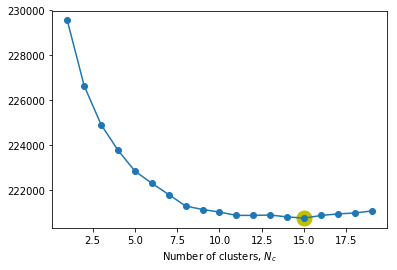

In [14]:
plt.plot([arr_Nc[14]],[arr_BIC[14]],marker='o',markersize=15,color='y')
plt.plot(arr_Nc,arr_BIC,marker='o',label='BIC')
# aic = plt.plot(arr_Nc,arr_AIC,marker='o',label='AIC')

#plt.ylabel('BIC')
plt.xlabel(r'Number of clusters, $N_c$')
# plt.legend(['BIC','AIC'])
plt.savefig('figBIC.png')

In [8]:
arr_BIC.argmin()

14